In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


data = None
with open('Москва_2021.txt') as file:
    data = [int(line.rstrip()) for line in file]


In [37]:
def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_avg(data: list):
    return sum(data) / len(data)


def count_avg(data: list):
    return sum(data) / len(data)

def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_var_coef(data):
    return count_sko(data) / count_mathematical_expectation(data)

def count_moda(data):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    max_val = max(num_of_occurrences, key=num_of_occurrences.get)
    max_val_freq = num_of_occurrences[max_val] / len(data)

    return [max_val, num_of_occurrences[max_val], len(data)]

def count_razmax(data):
    return max(data) - min(data)

def find_second_max_and_min(data):

    sorted_data = sorted(set(data))
    
    return sorted_data[1], sorted_data[-2]

def find_k_momentum(data: list, k: int):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    mat_exp = count_mathematical_expectation(data)

    momentum = 0

    for val in num_of_occurrences:
        momentum += (val - mat_exp) ** k * (num_of_occurrences[val] / len(data))
    
    return momentum

def count_asymmetry(data):
    return find_k_momentum(data, 3) / (count_sko(data) ** 3)

def count_excess(data):
    return find_k_momentum(data, 4) / (count_sko(data) ** 4) - 3


def count_median(data):
    if len(data) % 2 == 1:
        m = (len(data)-1) // 2
        return sorted(data)[m+1]
    else:
        m = len(data) // 2
        return (sorted(data)[m] + sorted(data)[m+1])/2


1. Из генеральной совокупности сгенерировать 36 выборок одинакового
объема, для каждой из которых найти выборочную среднюю. Объем
определить по схеме повторной выборки так, чтобы с надежностью γ = 0,95
обеспечить точность оценки математического ожидания δ = 3 года.

In [38]:
# 𝑡 – коэффициент кратности ошибки, определяемый по таблице
# значений функции Лапласа: 2Φ(𝑡) = 𝛾 (Φ(𝑡) = 𝛾⁄2)
t=2

# 𝜎 – среднее квадратическое отклонение
sko = count_sko(data)


# 𝛿 – точность
accurancy = 3

# n – объем выборки
z = 1.96
delta = 3
sigma = np.std(data)

n = round((z * sigma / delta)**2)

print('n – объем выборки = ', n)

n – объем выборки =  62


In [39]:
import copy

n = 64.4
samples = []
all_avgs = []

data_cp = copy.deepcopy(data)

for group_id in range(36):
    sample = []
    for _ in range(math.ceil(n)):
        val = np.random.choice(data_cp)
        data_cp.remove(val)
        sample.append(val)

    all_avgs.append(count_avg(sample))
    samples.append(sample)
                    
    print('группа ',group_id, '; среднее: ', count_avg(sample))


группа  0 ; среднее:  35.15384615384615
группа  1 ; среднее:  35.03076923076923
группа  2 ; среднее:  37.58461538461538
группа  3 ; среднее:  33.61538461538461
группа  4 ; среднее:  35.4
группа  5 ; среднее:  34.36923076923077
группа  6 ; среднее:  33.292307692307695
группа  7 ; среднее:  34.84615384615385
группа  8 ; среднее:  35.92307692307692
группа  9 ; среднее:  36.43076923076923
группа  10 ; среднее:  36.292307692307695
группа  11 ; среднее:  35.09230769230769
группа  12 ; среднее:  35.38461538461539
группа  13 ; среднее:  37.16923076923077
группа  14 ; среднее:  36.753846153846155
группа  15 ; среднее:  33.15384615384615
группа  16 ; среднее:  37.12307692307692
группа  17 ; среднее:  35.90769230769231
группа  18 ; среднее:  35.89230769230769
группа  19 ; среднее:  33.58461538461538
группа  20 ; среднее:  32.784615384615385
группа  21 ; среднее:  35.13846153846154
группа  22 ; среднее:  37.01538461538462
группа  23 ; среднее:  34.30769230769231
группа  24 ; среднее:  34.646153846

2. На основании полученных значений выборочных средних построить
интервальный ряд распределения, в котором левая граница – округленное
вниз минимальное значение выборочной средней, правая граница –
округленное вверх максимальное значение выборочной средней, длина
интервала – 1 год. Вычислить относительные частоты, построить
гистограмму

In [40]:
min_avg = round(min(all_avgs))
max_avg = round(max(all_avgs))

selected_ages = []

selected_ages_count = {}

all_ages = set()
for age in range(min_avg, max_avg+1):
    print('возраст ',age-1, age, ':', data.count(age) , '/', len(data))
    selected_ages.extend([age]*data.count(age))

    selected_ages_count[age] = data.count(age)  / len(data) * 2.8



возраст  32 33 : 758 / 32423
возраст  33 34 : 869 / 32423
возраст  34 35 : 676 / 32423
возраст  35 36 : 1198 / 32423
возраст  36 37 : 522 / 32423
возраст  37 38 : 1006 / 32423


In [41]:
# plt.hist(selected_ages)

3. Осуществить выравнивание статистического ряда, найдя точечные
оценки нормального распределения методом моментов. Построить кривую
Гаусса, аппроксимировав ею гистограмму частот.

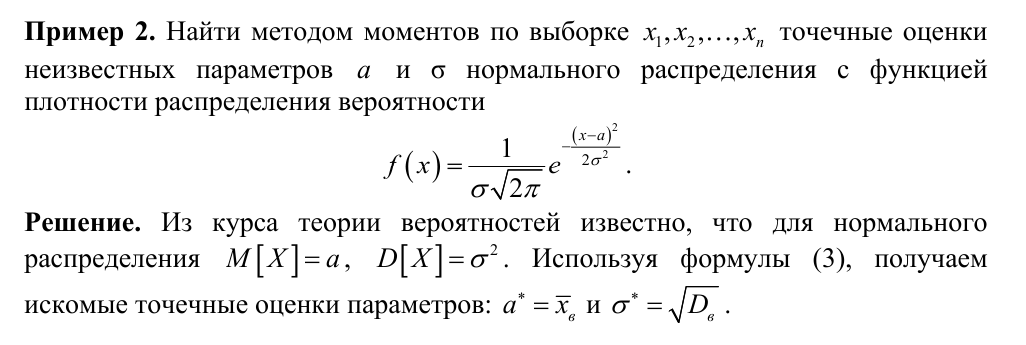

In [42]:
a_star = count_avg(selected_ages)
sigma_star = count_dispersion(selected_ages)

def func(x):
    return 1 / (sigma_star * (2 * math.pi) ** 0.5) * math.e ** ( - (x - a_star) ** 2 / (2 * sigma_star ** 2) ) 

<Axes: >

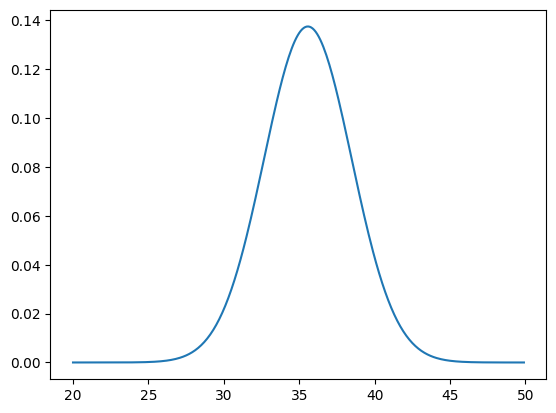

In [43]:
def frange(x, y, jump):
    while x < y:
        yield x
        x += jump

x_vals = list(frange(20, 50, 0.1))
y_vals = []

for x in x_vals:
    y_vals.append(func(x))

# plt.plot(x_vals, y_vals)
sns.lineplot(x=x_vals, y=y_vals)

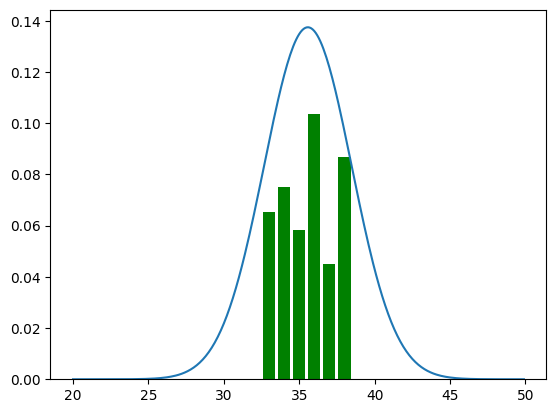

In [44]:
plt.bar(list(selected_ages_count.keys()), selected_ages_count.values(), color='g')

plt.plot(x_vals, y_vals)


4. На основании одной из сгенерированных выборок найти
доверительный интервал для оценки математического ожидания случайной
величины «возраст» с надежностью 0,95, предполагая, что среднее
квадратическое отклонение неизвестно.

In [45]:
selected_sample = samples[0]
sko = count_sko(selected_sample)
interval = t * sko  / (len(selected_sample) ** 0.5)

print('interval = ', interval)
print(count_avg(selected_sample) , '+-', interval,)

interval =  3.1571782080834025
35.15384615384615 +- 3.1571782080834025
